In [1]:
import pandas as pd

In [2]:
df_test = pd.read_csv('C:/Users/lissn/Thesis/data/trainZR_v2.csv')

In [3]:
df_test.head(10)

,timestamp,stationId,R,Z,dBZ,radar_norm,dist_coast,dist_radar,topo,toy_sin,toy_cos,tod_sin,tod_cos
0,2022-04-02 04:10:00,5045,0.0,0.0,0.0,0.0,0.004757,0.069321,0.085714,0.99993,-0.011826,0.887011,0.461749
1,2022-04-02 04:10:00,5047,0.0,0.0,0.0,0.0,0.039805,0.057762,0.114286,0.99993,-0.011826,0.887011,0.461749
2,2022-04-02 04:10:00,5052,0.0,0.0,0.0,0.0,0.000440,0.079317,0.057143,0.99993,-0.011826,0.887011,0.461749
3,2022-04-02 04:10:00,5054,0.0,0.0,0.0,0.0,0.000815,0.077850,0.142857,0.99993,-0.011826,0.887011,0.461749
4,2022-04-02 04:10:00,5056,0.0,0.0,0.0,0.0,0.000000,0.081571,0.057143,0.99993,-0.011826,0.887011,0.461749
5,2022-04-02 04:10:00,5058,0.0,0.0,0.0,0.0,0.017037,0.090636,0.342857,0.99993,-0.011826,0.887011,0.461749
6,2022-04-02 04:10:00,5061,0.0,0.0,0.0,0.0,0.027311,0.094591,0.171429,0.99993,-0.011826,0.887011,0.461749
7,2022-04-02 04:10:00,5107,0.0,0.0,0.0,0.0,0.005579,0.173747,0.085714,0.99993,-0.011826,0.887011,0.461749
8,2022-04-02 04:10:00,5115,0.0,0.0,0.0,0.0,0.004619,0.135873,0.057143,0.99993,-0.011826,0.887011,0.461749
9,2022-04-02 04:10:00,5125,0.0,0.0,0.0,0.0,0.104482,0.100079,0.257143,0.99993,-0.011826,0.887011,0.461749


In [4]:
import numpy as np
df_test = df_test[(df_test['R'] != 0) & (df_test['Z'] != 0) & ~df_test['R'].isnull() & ~df_test['Z'].isnull()]

In [5]:
np.log(df_test['Z']).min()

0.115129254649702

In [6]:
np.log(df_test['Z']).max()

14.391156831212786

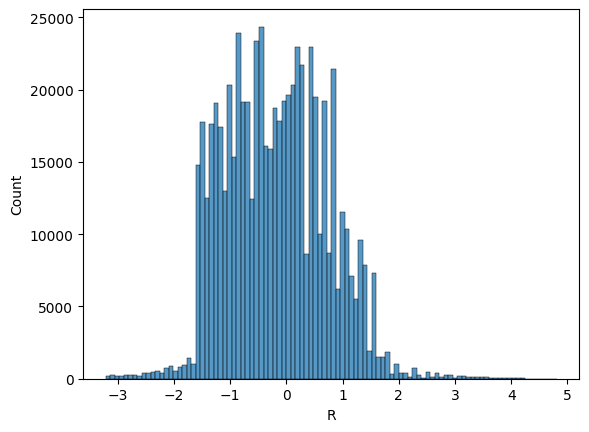

In [7]:
# Plot og logarithm 

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(np.log(df_test['R']*60), bins=100)
plt.show()

### Missing radar data

C:\Users\lissn\AppData\Local\Temp\ipykernel_7232\3978659582.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  all_months = pd.date_range(start_date_dt, end_date_dt, freq='M').strftime('%Y-%m').tolist()
100%|██████████| 91873/91873 [00:04<00:00, 20889.51it/s]


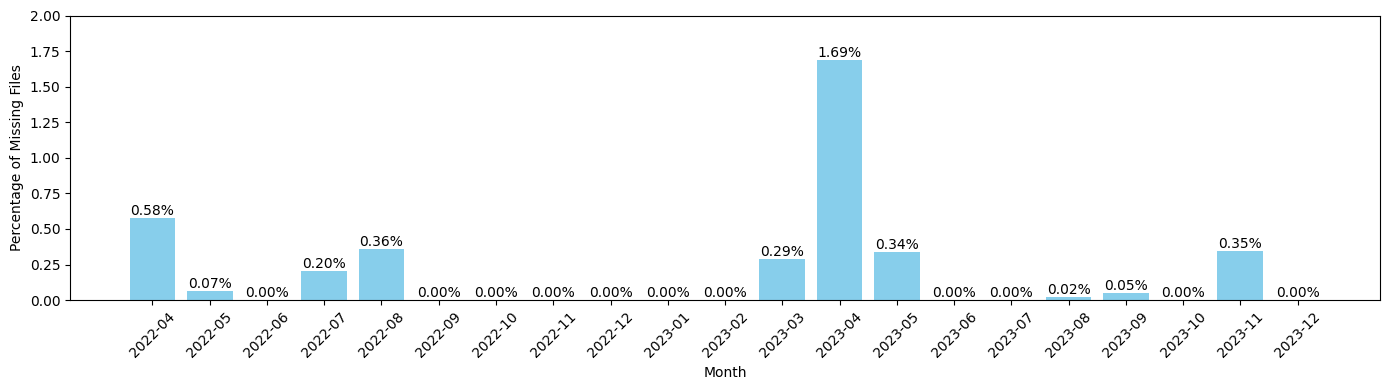

In [20]:
data_dir = "C:/Users/lissn/Thesis/data/radar"

start_date = '20220402'
end_date = '20231231'

start_date_dt, end_date_dt = pd.to_datetime(start_date), pd.to_datetime(end_date)
filtered_dates = [date for date in pd.date_range(start_date_dt, end_date_dt, freq='5min') if date.minute % 10 == 0]

# Generate a complete list of month-year keys and expected counts
all_months = pd.date_range(start_date_dt, end_date_dt, freq='M').strftime('%Y-%m').tolist()
expected_counts = {month: 6*24*pd.Timestamp(month).days_in_month for month in all_months}  # 6 times per hour, 24 hours a day

# Initialize failures_by_month with zeros for all months
failures_by_month = {month: 0 for month in all_months}

total_expected = 0
total_missing = 0

for date in tqdm(filtered_dates):
    year, month, day, hour, minute = date.year, date.month, date.day, date.hour, date.minute
    file_path = f"{data_dir}/{year}/{year}/{month:02d}/{day:02d}/dk.com.{year}{month:02d}{day:02d}{hour:02d}{minute:02d}.500_max.h5"
    
    # Update total expected files count
    total_expected += 1
    
    # Check if file does not exist (simulating pf.load_radar_image's failure to load)
    if not os.path.exists(file_path):
        fail_key = f"{year}-{month:02d}"
        failures_by_month[fail_key] += 1
        # Update total missing files count
        total_missing += 1

# Calculate the total percentage of missing files
total_percentage_missing = (total_missing / total_expected) * 100

# Calculate percentages
percentages = {month: (failures/expected_counts[month])*100 for month, failures in failures_by_month.items()}

# Plotting
plt.figure(figsize=(14, 4))
bars = plt.bar(percentages.keys(), percentages.values(), color='skyblue')
plt.xlabel('Month')
plt.ylabel('Percentage of Missing Files')
#plt.title('Percentage of Missing Radar Files by Month')
plt.xticks(rotation=45)
plt.ylim(0, 2)

# Adding percentage above each bar
for bar, percentage in zip(bars, percentages.values()):
    plt.text(bar.get_x() + bar.get_width() / 2., bar.get_height(), f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('C:/Users/lissn/Thesis/figures/missing_files.png')
plt.show()

In [19]:
print(f"Total percentage of missing files: {total_percentage_missing:.2f}%")

Total percentage of missing files: 0.19%


### Missing rain gauge data

In [23]:
base_path = 'C:/Users/lissn/Thesis'

# Load 2023 SVK data
SVK_path22 = base_path + '/data/2022_rain_observations.csv'
df22 = pd.read_csv(SVK_path22)
df22['time'] = pd.to_datetime(df22['time'])
# Apply date filter for 2022 data starting from April 2nd
df22 = df22[(df22['time'] >= '2022-04-02') & (df22['time'].dt.year == 2022)]

# Load 2023 SVK data
SVK_path23 = base_path + '/data/2023_rain_observations.csv'
df23 = pd.read_csv(SVK_path23)
df23['time'] = pd.to_datetime(df23['time'])
df23= df23[df23['time'].dt.year == 2023] # Only keep 2023 data

# Concatenate the two dataframes
df = pd.concat([df22, df23], ignore_index=True)
df = df.set_index(df.columns[0])

total_values = df.size
zero_counts = (df == 0).sum().sum()
nan_counts = df.isna().sum().sum()
positive_counts = (df > 0).sum().sum()

# Calculate percentages
percent_zero = (zero_counts / total_values) * 100
percent_nan = (nan_counts / total_values) * 100  
percent_positive = (positive_counts / total_values) * 100

print(f"Percentage of 0 values: {percent_zero:.2f}%")
print(f"Percentage of NaN values: {percent_nan:.2f}%")
print(f"Percentage of positive values: {percent_positive:.2f}%")

Percentage of 0 values: 93.11%
Percentage of NaN values: 1.43%
Percentage of positive values: 5.45%
